In [1]:
print("Hello, world!")
print("Starting project...")

Hello, world!
Time to predict the future using time series!


In [73]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                  # plots


In [2]:
# TASK 1
print("Time to predict the future using time series!")

Time to predict the future using time series!


In [22]:
print("Importing dataset...")
data = pd.read_csv("..\..\..\Datasets\Crimes - 2001 to Present.csv", dtype=object)
print("Dataset imported.")

Importing dataset...
Dataset imported.


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189731 entries, 0 to 7189730
Data columns (total 22 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    object
 1   Case Number           object
 2   Date                  object
 3   Block                 object
 4   IUCR                  object
 5   Primary Type          object
 6   Description           object
 7   Location Description  object
 8   Arrest                object
 9   Domestic              object
 10  Beat                  object
 11  District              object
 12  Ward                  object
 13  Community Area        object
 14  FBI Code              object
 15  X Coordinate          object
 16  Y Coordinate          object
 17  Year                  object
 18  Updated On            object
 19  Latitude              object
 20  Longitude             object
 21  Location              object
dtypes: object(22)
memory usage: 1.2+ GB


In [28]:
data.drop(data.columns.difference(['Date', 'Arrest']), 1, inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189731 entries, 0 to 7189730
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      object        
 1   Arrest    object        
 2   DateTime  datetime64[ns]
 3   YM        datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 219.4+ MB


In [31]:
data['DateTime'] = pd.to_datetime(data['Date'])
# data['Year'] = data['DateTime'].dt.year
# datad['Month'] = data['DateTime'].dt.month

In [33]:
data['YM'] = data['DateTime'].astype('datetime64[M]')

In [36]:
data2 = data.copy()

In [46]:
# data2 = data2.drop('Date', 1)
# data2 = data2.drop('DateTime', 1)

In [92]:
data2.head()

,Arrest,YM
0,0,2001-01-01
1,0,2017-10-01
2,0,2017-03-01
3,0,2017-09-01
4,0,2017-08-01


In [59]:
data2['Arrest'] = data2['Arrest'].map({'true': 1, 'True': 1, 'false': 0, 'False': 0})

In [67]:
data_true = data2[data2.Arrest == 1]
data_false = data2[data2.Arrest == 0]

In [86]:
dataT = data_true.groupby('YM').count()
dataF = data_false.groupby('YM').count()

In [89]:
dataT = dataT[:-9]
dataF = dataF[:-9]

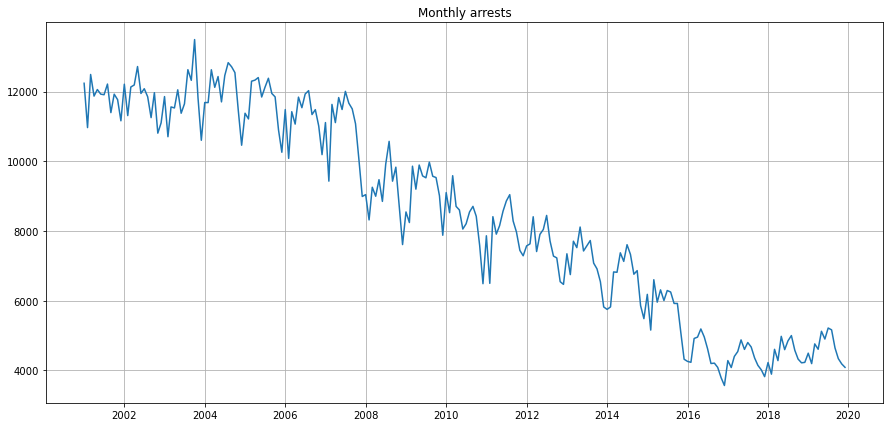

In [90]:
plt.figure(figsize=(15,7))
plt.plot(dataT.Arrest)
plt.title('Monthly arrests')
plt.grid(True)
plt.show()

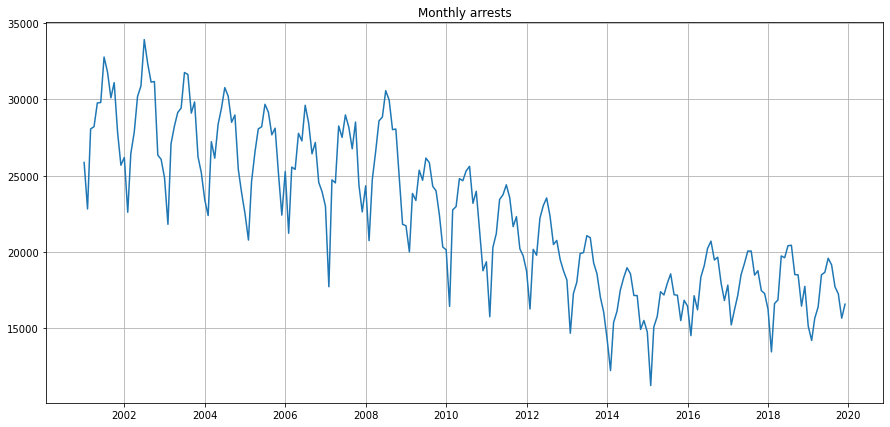

In [91]:
plt.figure(figsize=(15,7))
plt.plot(dataF.Arrest)
plt.title('Monthly arrests')
plt.grid(True)
plt.show()